In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif,VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow import keras

In [18]:
performance = pd.read_csv('score.csv',index_col=None)
# performance.drop(['Unnamed: 0'],axis = 1, inplace = True)
performance.head()

,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_speed,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score
0,1.037037,39.764994,0.228964,18.842723,1.037037,39.764994,1.118034,24.554250,0.548671,24.100631,...,0.897345,26.885087,0.538023,9.054409,0.756757,18.751449,0.538023,9.054409,13,66
1,0.841993,10.612557,1.063544,16.046416,0.841993,10.612557,2.055141,21.855147,0.000000,0.000000,...,0.000000,0.000000,1.370480,11.035946,1.077659,16.334832,1.370480,11.035946,19,106
2,0.000000,0.000000,0.644807,13.712780,0.000000,0.000000,1.179525,16.184478,0.732854,29.810227,...,1.496788,13.693053,1.084692,17.377983,0.000000,0.000000,1.084692,17.377983,21,114
3,1.031261,16.685405,1.018901,17.108218,1.031261,16.685405,0.683298,8.791589,0.628192,19.235441,...,1.258426,9.338154,1.197073,7.008839,0.903226,43.491545,1.197073,7.008839,20,134


In [15]:
performance.describe()

,Unnamed: 0,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,...,point_twelve_speed,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.819360,13.563517,0.674214,16.662902,0.798273,16.964588,1.258157,18.199100,0.484470,...,0.886149,11.934735,1.070196,12.068226,0.683825,22.629960,1.093782,10.297203,19.080000,108.400000
std,14.57738,0.370583,14.427272,0.346257,2.000586,0.386601,16.296986,0.465819,6.218594,0.266659,...,0.599343,10.852083,0.303564,3.860443,0.446684,14.983815,0.301110,3.882309,2.389091,24.257126
min,0.00000,0.000000,0.000000,0.228964,13.712780,0.000000,0.000000,0.683298,8.791589,0.000000,...,0.000000,0.000000,0.538023,7.008839,0.000000,0.000000,0.538023,7.008839,13.000000,66.000000
25%,12.25000,0.841993,0.000000,0.228964,16.046416,0.841993,0.000000,1.118034,10.639811,0.548671,...,0.000000,0.000000,1.084692,9.054409,0.000000,16.334832,1.084692,7.008839,19.000000,106.000000
50%,24.50000,1.031261,10.612557,0.644807,17.108218,1.031261,13.648981,1.179525,21.855147,0.588432,...,0.897345,13.693053,1.197073,11.035946,0.903226,16.334832,1.197073,9.054409,20.000000,110.000000
75%,36.75000,1.037037,16.685405,1.018901,18.842723,1.037037,39.764994,1.179525,21.855147,0.628192,...,1.496788,26.885087,1.327128,17.377983,1.077659,43.491545,1.370480,11.035946,20.000000,134.000000
max,49.00000,1.037037,39.764994,1.063544,18.842723,1.037037,39.764994,2.055141,24.554250,0.732854,...,1.496788,26.885087,1.370480,17.377983,1.077659,43.491545,1.370480,17.377983,21.000000,134.000000


In [16]:
emptyList = []
performanceColumn = performance.columns
print(performanceColumn)

for index, row in performance.iterrows():
    for name in performanceColumn:
        if row[name] == 0:
            performance.at[index,name]=performance[name].median()
tempDisease = performance.drop(emptyList)
#reformative the data, make is continuous.
tempDisease = tempDisease.reset_index(drop=True)
performance = tempDisease
performance.describe()

Index(['Unnamed: 0', 'point_one_speed', 'point_one_deviation',
       'point_two_speed', 'point_two_deviation', 'point_three_speed',
       'point_three_deviation', 'point_four_speed', 'point_four_deviation',
       'point_five_speed', 'point_five_deviation', 'point_six_speed',
       'point_six_deviation', 'point_seven_speed', 'point_seven_deviation',
       'point_eight_speed', 'point_eight_deviation', 'point_nine_speed',
       'point_nine_deviation', 'point_ten_speed', 'point_ten_deviation',
       'point_eleven_speed', 'point_eleven_deviation', 'point_twelve_speed',
       'point_twelve_deviation', 'point_thirteen_speed',
       'point_thirteen_deviation', 'point_fourteen_speed',
       'point_fourteen_deviation', 'point_fifteen_speed',
       'point_fifteen_deviation', 'CollectCount', 'Score'],
      dtype='object')


,Unnamed: 0,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,...,point_twelve_speed,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.990000,0.984362,17.171786,0.674214,16.662902,0.983900,22.516170,1.258157,18.199100,0.621083,...,1.137405,16.864234,1.070196,12.068226,0.936728,24.916837,1.093782,10.297203,19.080000,108.400000
std,14.142312,0.085282,11.578259,0.346257,2.000586,0.085005,11.603526,0.465819,6.218594,0.059888,...,0.265460,6.464010,0.303564,3.860443,0.120042,12.315848,0.301110,3.882309,2.389091,24.257126
min,1.000000,0.841993,10.612557,0.228964,13.712780,0.841993,10.612557,0.683298,8.791589,0.548671,...,0.897345,9.338154,0.538023,7.008839,0.756757,16.334832,0.538023,7.008839,13.000000,66.000000
25%,13.250000,0.889310,10.612557,0.228964,16.046416,0.889310,16.519350,1.118034,10.639811,0.548671,...,0.897345,13.693053,1.084692,9.054409,0.903226,16.334832,1.084692,7.008839,19.000000,106.000000
50%,24.750000,1.031261,10.612557,0.644807,17.108218,1.031261,16.685382,1.179525,21.855147,0.628173,...,0.897345,13.693053,1.197073,11.035946,0.903226,16.334832,1.197073,9.054409,20.000000,110.000000
75%,36.750000,1.037037,16.685405,1.018901,18.842723,1.037037,39.764994,1.179525,21.855147,0.628192,...,1.496788,26.885087,1.327128,17.377983,1.077659,43.491545,1.370480,11.035946,20.000000,134.000000
max,49.000000,1.037037,39.764994,1.063544,18.842723,1.037037,39.764994,2.055141,24.554250,0.732854,...,1.496788,26.885087,1.370480,17.377983,1.077659,43.491545,1.370480,17.377983,21.000000,134.000000


<Axes: xlabel='Score', ylabel='count'>

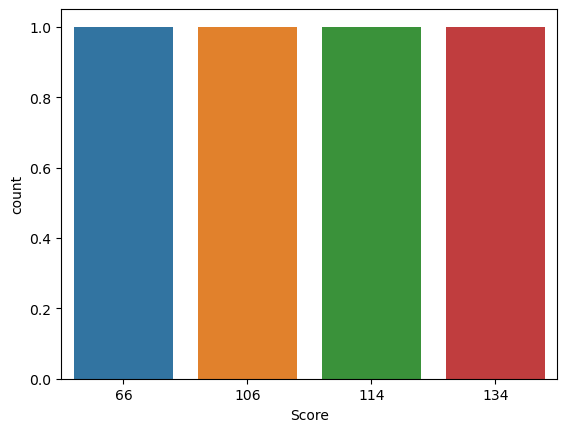

In [5]:
sns.countplot(x = 'Score', data =performance)

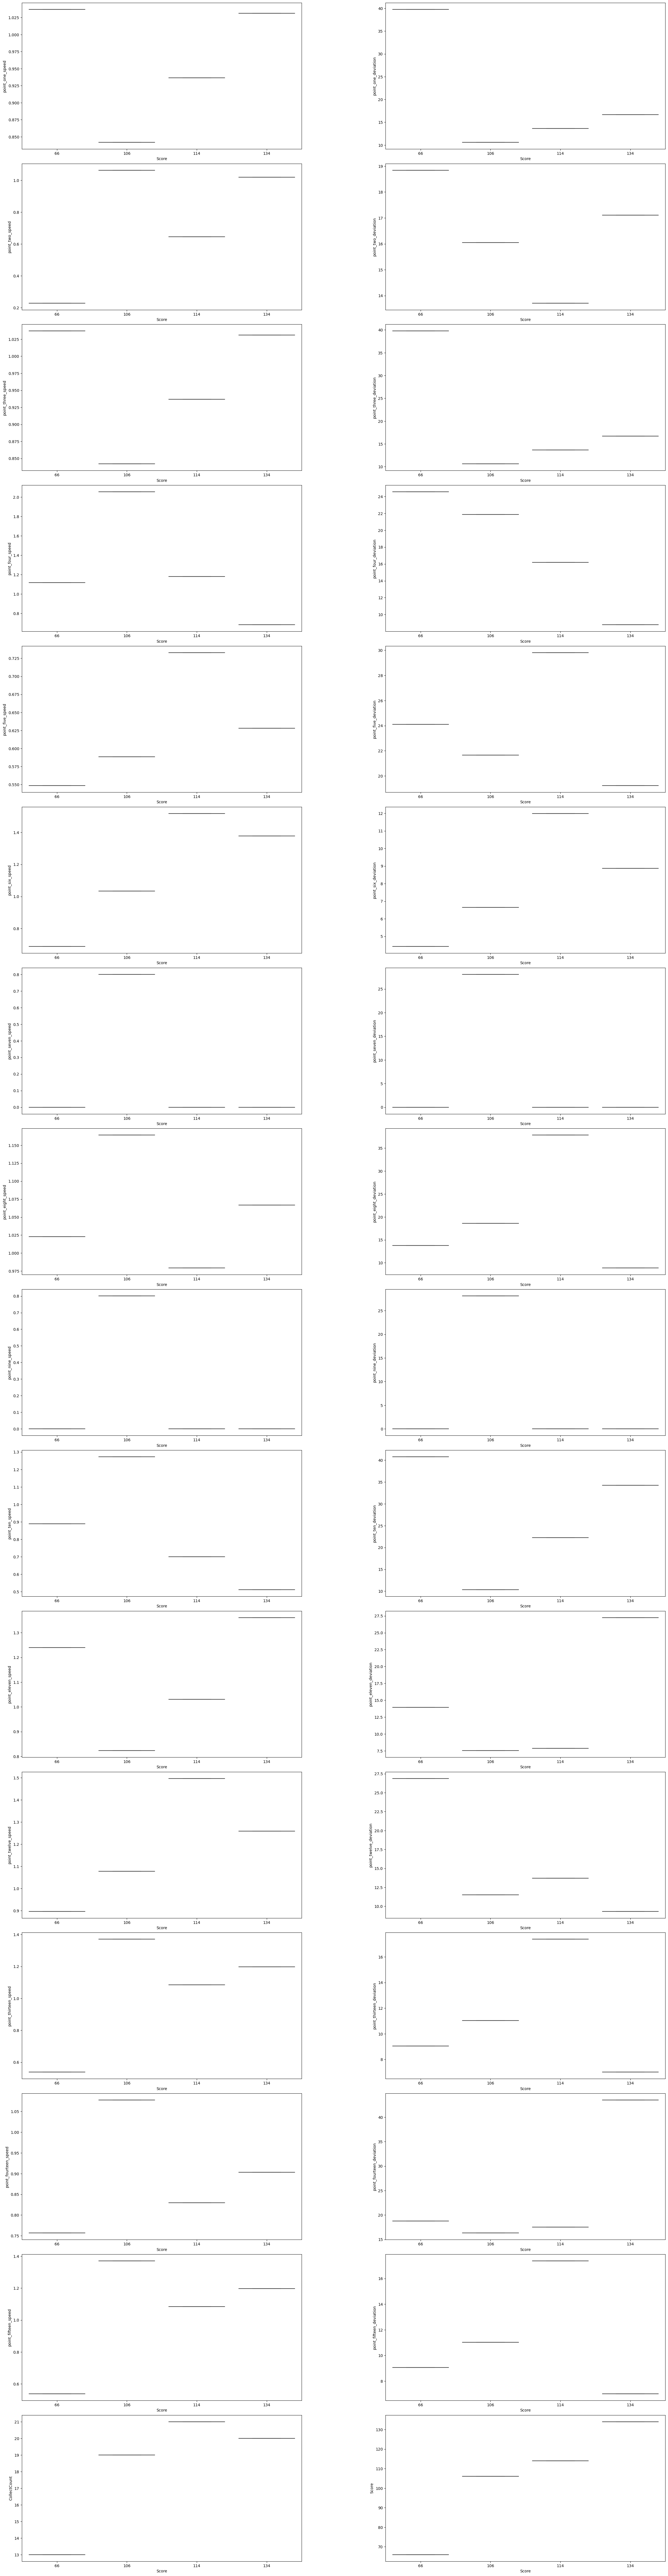

In [6]:
fig,axes=plt.subplots(nrows=16,ncols=2,figsize=(30,120))
fig.subplots_adjust(hspace=.10,wspace=.3)
axes=axes.ravel()

for i,col in enumerate(performance.columns[1:]):
   _=sns.boxplot(y=col,x='Score',data=performance,ax=axes[i])

In [7]:
corrMatt = performance.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(200, 120))
plt.title('Adult Feature Correlation')
#Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
           ax=ax, annot=True, fmt='.2g', linewidths=1)

/var/folders/n0/y1w98s3557bd6hkpr97m56dc0000gn/T/ipykernel_58546/1161412413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatt = performance.corr()


<Axes: title={'center': 'Adult Feature Correlation'}>

In [22]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
performance = pd.read_csv('House.csv')
performance = performance.astype(np.float32)
# Preprocess the data
X = performance.drop(columns=['year'])
y = performance['year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (scores[1]*100))


Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 5881350.5000 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 1ms/step - loss: -10890070.0000 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: -27753106.0000 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: -45831900.0000 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: -62839516.0000 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: -79876280.0000 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: -97447240.0000 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: -115443320.0000 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: -133589760.0000 - accuracy: 0.0000e+00
Epoch 10/50
2/2 [===========